<a href="https://colab.research.google.com/github/Harish900023/AICTE_Internships/blob/main/Ev_forecasting_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fitting 3 folds for each of 30 candidates, totalling 90 fits
✅ Best Parameters: {'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 15}
📉 MAE: 0.01, RMSE: 0.06, R2 Score: 1.00


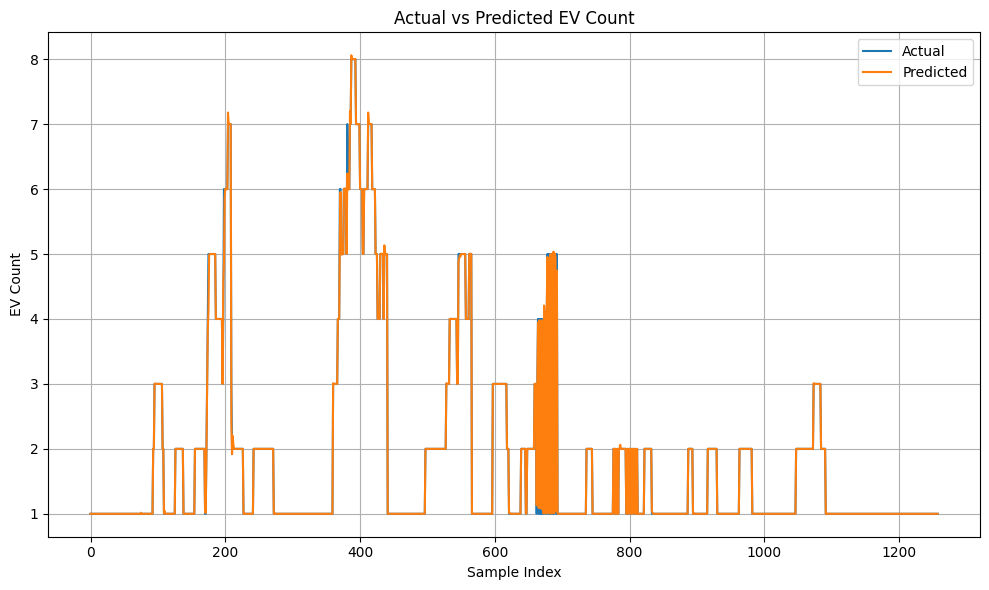

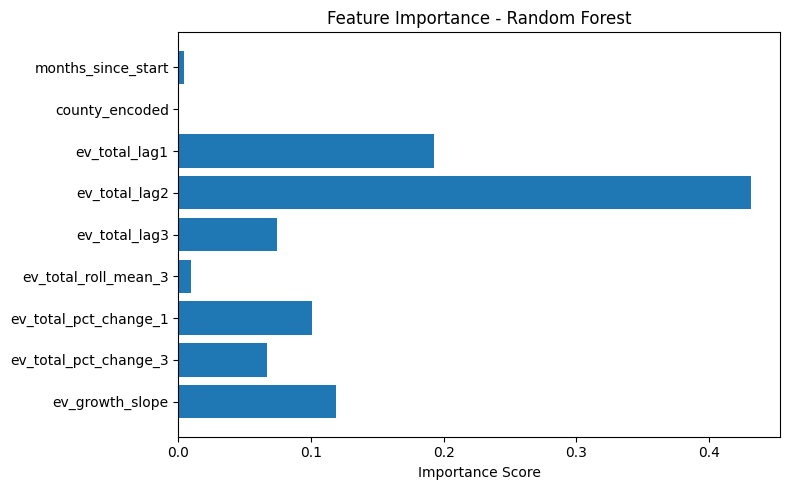

In [ ]:
# 📦 Import Libraries
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 📥 Load Preprocessed Data
df = pd.read_csv("preprocessed_ev_data.csv")
df.head()

# 🧠 Define Features and Target
features = [
    'months_since_start',
    'county_encoded',
    'ev_total_lag1',
    'ev_total_lag2',
    'ev_total_lag3',
    'ev_total_roll_mean_3',
    'ev_total_pct_change_1',
    'ev_total_pct_change_3',
    'ev_growth_slope'
]
target = 'Electric Vehicle (EV) Total'
X = df[features]
y = df[target]

# 🔀 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.1)

# 🔧 Define Random Forest + RandomizedSearchCV Parameters
param_dist = {
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2', None]
}

# 🔍 Randomized Search CV
rf = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# 🏁 Train Model
random_search.fit(X_train, y_train)
model = random_search.best_estimator_
print("✅ Best Parameters:", random_search.best_params_)

# 💾 Save Model
joblib.dump(model, "forecasting_ev_model.pkl")

# 🔮 Predict and Evaluate
y_pred = model.predict(X_test)

def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2Score = r2_score(y_true, y_pred)
    print(f"📉 MAE: {mae:.2f}, RMSE: {rmse:.2f}, R2 Score: {r2Score:.2f}")

evaluate(y_test, y_pred)

# 📈 Plot Actual vs Predicted
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Actual vs Predicted EV Count")
plt.xlabel("Sample Index")
plt.ylabel("EV Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 📊 Feature Importance
importances = model.feature_importances_
plt.figure(figsize=(8,5))
plt.barh(features, importances)
plt.xlabel("Importance Score")
plt.title("Feature Importance - Random Forest")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()